In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
plt.rc('font', family='Verdana')


In [2]:
import sys
print("версия Python: {}".format(sys.version))
import pandas as pd
print("версия Pandas: {}".format(pd.__version__))
import matplotlib
print("версия matplotlib: {}".format(matplotlib.__version__))
import numpy as np
print("версия Numpy: {}".format(np.__version__))
import scipy as sp
print("версия SciPy: {}".format(sp.__version__))
import IPython
print("версия IPython: {}".format(IPython.__version__))
import sklearn
print("версия scikit-learn: {}".format(sklearn.__version__))

версия Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
версия Pandas: 0.25.1
версия matplotlib: 3.2.2
версия Numpy: 1.16.5
версия SciPy: 1.3.1
версия IPython: 7.8.0
версия scikit-learn: 0.21.3


In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print("Ключи iris_dataset: \n{}".format(iris_dataset.keys()))

Ключи iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(iris_dataset['DESCR'][:193] + '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [6]:
print("Название ответов: {}".format(iris_dataset['target_names']))

Название ответов: ['setosa' 'versicolor' 'virginica']


In [7]:
print("Название признаков: \n{}".format(iris_dataset['feature_names']))

Название признаков: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print("Тип массива data: {}".format(type(iris_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [9]:
print("Форма массива data {}".format(iris_dataset['data'].shape))

Форма массива data (150, 4)


In [10]:
print("Первые пять строк массива data \n{}".format(iris_dataset['data'][:5]))

Первые пять строк массива data 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print("Тип массива target: {}".format(type(iris_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [12]:
print("Тип массива data: {}".format(type(iris_dataset['target'])))

Тип массива data: <class 'numpy.ndarray'>


In [13]:
print("Форма массива target \n{}".format(iris_dataset['target']))

Форма массива target 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
print("Ответы \n{}".format(iris_dataset['target']))

Ответы 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
      iris_dataset['data'], iris_dataset['target'], random_state=0)

In [16]:
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))

форма массива X_train: (112, 4)
форма массива y_train: (112,)


In [17]:
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_test: (38, 4)
форма массива y_test: (38,)


C:\Users\Denis\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Denis\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Denis\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Denis\Anaconda3\lib\site-packages\pandas\plotting\_matpl

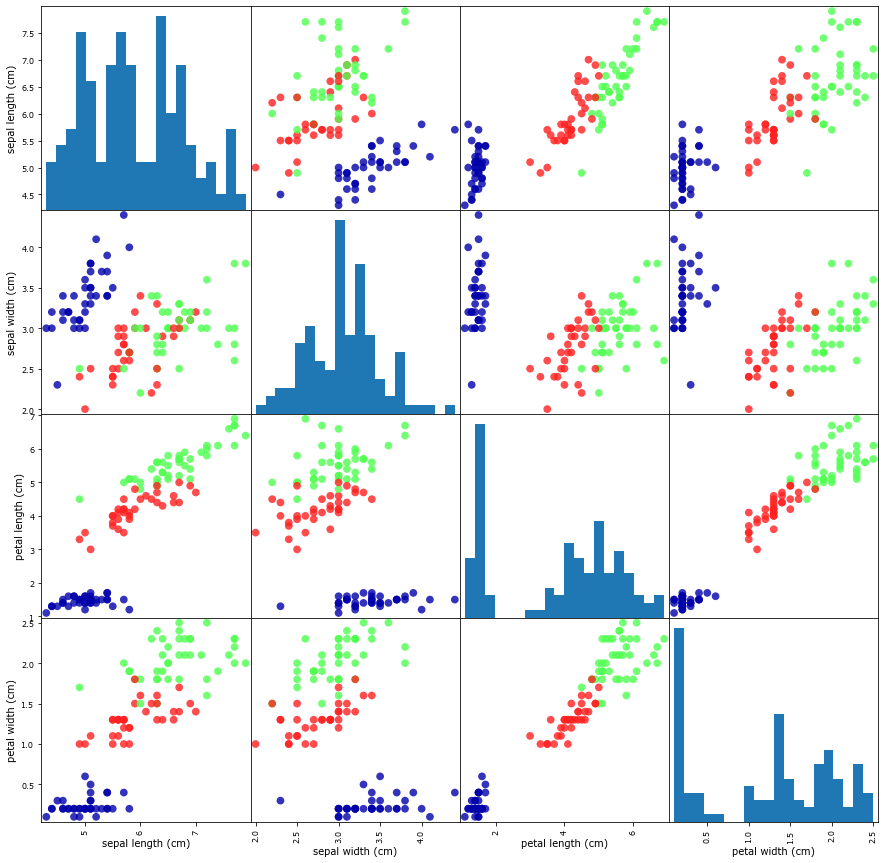

In [18]:
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

### Построение первой модели:Метод к ближайших соседей

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Получение прогнозов

In [21]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"Форма массива X_new: {X_new.shape}")

Форма массива X_new: (1, 4)


In [22]:
prediction = knn.predict(X_new)
print(f"Прогноз {iris_dataset['target_names'][prediction]}")

Прогноз ['setosa']


### Оценка качества модели

In [25]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [26]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.97


In [29]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


# Методы машинного обучения с учителем

## Классификация и регрессия

Форма массива Х: (26, 2)


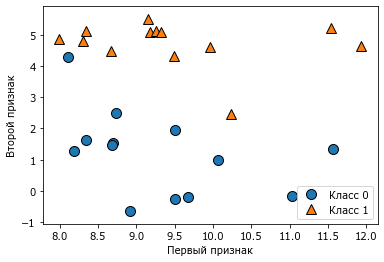

In [2]:
# генереруем набор данных
X, y = mglearn.datasets.make_forge()
# строим график для набор данных
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива Х: {}".format(X.shape))

Text(0, 0.5, 'Целевая переменная')

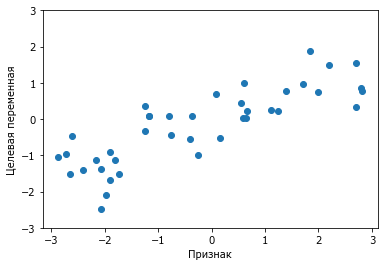

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y,'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))

Ключи cancer(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
print("Форма массива data для набора cancer: {}".format(cancer.data.shape))

Форма массива data для набора cancer: (569, 30)


In [8]:
print("Количество примеров для каждого класса:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(
       cancer.target))}))

Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}


In [9]:
print("Имена признаков:\n{}".format(cancer.feature_names))

Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Форма массива data для набора boston: {}".format(boston.data.shape))

Форма массива data для набора boston: (506, 13)


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print("форма массива Х: {}".format(X.shape))

форма массива Х: (506, 104)


## Метод к ближайших соседей

### Классификация с помощью k ближайщих соседей

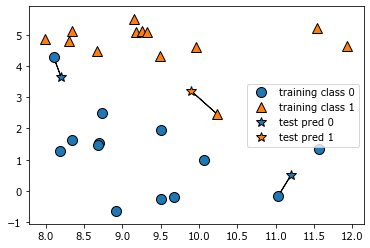

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

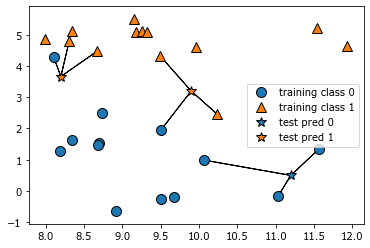

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [15]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


In [19]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Правильность на тестовом наборе: 0.86


### Анализ работы класса KNeighborsClassifier